In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
target_products=pd.read_csv('/content/drive/MyDrive/project_1/after/target_products.csv')
target_orders=pd.read_csv('/content/drive/MyDrive/project_1/after/target_orders.csv')
gf_products=pd.read_csv('/content/drive/MyDrive/project_1/after/gf_products.csv')
gf_orders=pd.read_csv('/content/drive/MyDrive/project_1/after/gf_orders.csv')

In [ ]:
#주요 제품군 추출(제품 종류 50개 이상) 

In [ ]:
gf_products.groupby('department').count().sort_values(by='product_id',ascending=False)

,product_id,product_name,aisle
department,,,
snacks,176,176,176
frozen,106,106,106
breakfast,102,102,102
bakery,98,98,98
pantry,85,85,85
dry goods pasta,83,83,83
dairy eggs,8,8,8
personal care,6,6,6
meat seafood,3,3,3


In [ ]:
primary_target_products=target_products[target_products.department.isin(['snacks','frozen','breakfast','bakery','pantry','dry goods pasta'])].reset_index(drop=True)
primary_target_orders=target_orders[target_orders.product_id.isin(primary_target_products.product_id)].reset_index(drop=True)
primary_gf_products=primary_target_products[primary_target_products.product_id.isin(gf_products.product_id)].reset_index(drop=True)
primary_gf_orders=gf_orders[gf_orders.product_id.isin(primary_gf_products.product_id)].reset_index(drop=True)

In [ ]:
#전체 시장 제품 종류 및 판매량 vs gluten-free제품 종류 및 판매량 

In [ ]:
df_comp=pd.DataFrame(data={'products':[len(gf_products),len(target_products)-len(gf_products)],'sales':[gf_orders['add_to_cart_order'].sum(),target_orders['add_to_cart_order'].sum()-gf_orders['add_to_cart_order'].sum()]},index=['gluten-free','else'])

In [ ]:
df_comp

,products,sales
gluten-free,669,3768903
else,14734,75052929


In [ ]:
#주요품목 시장 제품 종류 및 판매량 vs gluten-free제품 종류 및 판매량 

In [ ]:
df_primary_comp=pd.DataFrame(data={'products':[len(primary_gf_products),len(primary_target_products)-len(primary_gf_products)],'sales':[primary_gf_orders['add_to_cart_order'].sum(),primary_target_orders['add_to_cart_order'].sum()-primary_gf_orders['add_to_cart_order'].sum()]},index=['gluten-free','else'])

In [ ]:
df_primary_comp

,products,sales
gluten-free,650,3662402
else,12199,56700763


In [ ]:
#상품 종류 비율 

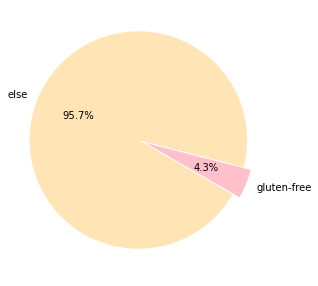

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df_comp['products'],labels=df_comp.index,autopct='%.1f%%',explode=[0,0.07],startangle=330,colors=['pink','moccasin'])
plt.show()

In [ ]:
#상품 판매량 점유율 

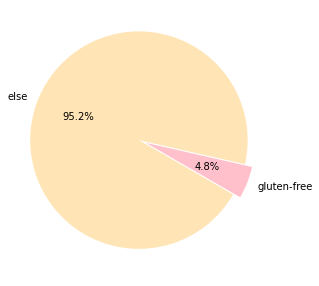

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df_comp['sales'],labels=df_comp.index,autopct='%.1f%%',explode=[0,0.07],startangle=330,colors=['pink','moccasin'])
plt.show()

In [ ]:
# 품목 대비 판매량 비율 

In [ ]:
df_comp_rate=pd.DataFrame(data=df_comp.loc['gluten-free']/df_comp.sum(),columns=['rate'])

In [ ]:
df_comp_rate

,rate
products,0.043433
sales,0.047815


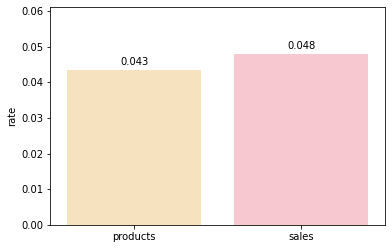

In [ ]:
ax = sns.barplot(data=df_comp_rate,y='rate',x=df_comp_rate.index,palette=['moccasin','pink'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height+0.0015, round(height,3), ha = 'center', size = 10)
ax.set_ylim(0, 0.061)
plt.show()

In [ ]:
# 제품 비율에 비해 약 12% 더 많은 평균 판매량을 보임

In [ ]:
#주요 상품 종류 비율 

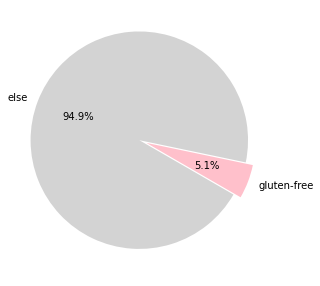

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df_primary_comp['products'],labels=df_primary_comp.index,autopct='%.1f%%',explode=[0,0.07],startangle=330,colors=['pink','lightgray'])
plt.show()

In [ ]:
#주요 상품 판매량 점유율 

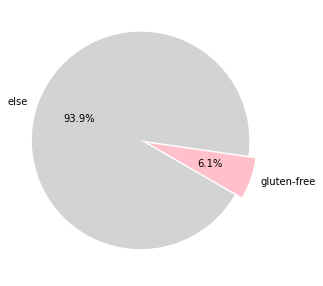

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df_primary_comp['sales'],labels=df_primary_comp.index,autopct='%.1f%%',explode=[0,0.07],startangle=330,colors=['pink','lightgray'])
plt.show()

In [ ]:
# 주요 품목 대비 판매량 비율 

In [ ]:
df_primary_comp_rate=pd.DataFrame(data=df_primary_comp.loc['gluten-free']/df_primary_comp.sum(),columns=['rate'])

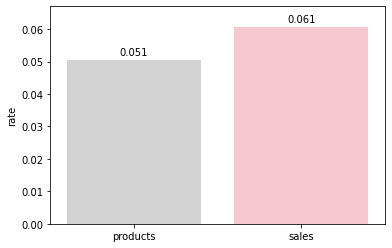

In [ ]:
ax = sns.barplot(data=df_primary_comp_rate,y='rate',x=df_comp_rate.index,palette=['lightgray','pink'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height+0.0015, round(height,3), ha = 'center', size = 10)
ax.set_ylim(0, 0.067)
plt.show()

In [ ]:
# 제품 비율에 비해 약 20% 더 많은 평균 판매량을 보임
# 수요에 비해 공급의 다양성이 부족함함

In [ ]:
#재구매율 비교

In [ ]:
else_orders=target_orders.drop(index=target_orders[target_orders.product_id.isin(gf_orders.product_id)].index).reset_index(drop=True)
else_orders

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order
0,2,30035,5,0,202279,8
1,2,40141,7,1,202279,8
2,2,1819,8,1,202279,8
3,3,33754,1,1,205970,12
4,3,32665,8,1,205970,12
...,...,...,...,...,...,...
8311486,3421049,17706,2,0,189544,3
8311487,3421056,5750,1,1,83898,11
8311488,3421056,16475,4,0,83898,11
8311489,3421058,6858,5,1,136952,15


In [ ]:
else_orders_reorder=round(else_orders.reordered.mean(),3)
gf_orders_reorder=round(gf_orders.reordered.mean(),3)

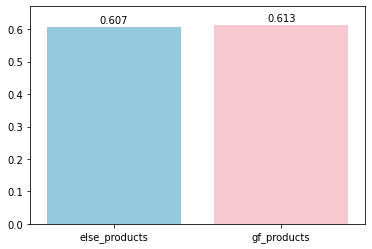

In [ ]:
ax = sns.barplot(x=['else_products','gf_products'],y=[else_orders_reorder,gf_orders_reorder],palette=['skyblue','pink'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height+0.01, round(height,3), ha = 'center', size = 10)
ax.set_ylim(0, 0.67)
plt.show()

In [ ]:
#재구매율은 크게 차이 없음 

In [ ]:
#5번 이상 구매한 단골 고객의 비율 

In [ ]:
else_products_regular=len(else_orders.groupby('product_id')['user_id'].value_counts()[else_orders.groupby('product_id')['user_id'].value_counts()>4])/len(else_orders.groupby('product_id')['user_id'].value_counts())

In [ ]:
gf_products_regular=len(gf_orders.groupby('product_id')['user_id'].value_counts()[gf_orders.groupby('product_id')['user_id'].value_counts()>4])/len(gf_orders.groupby('product_id')['user_id'].value_counts())

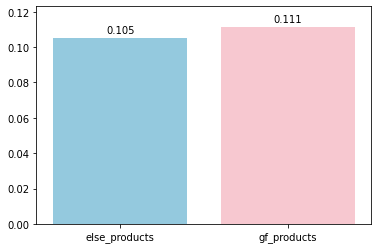

In [ ]:
ax = sns.barplot(x=['else_products','gf_products'],y=[else_products_regular,gf_products_regular],palette=['skyblue','pink'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height+0.0025, round(height,3), ha = 'center', size = 10)
ax.set_ylim(0, 0.123)
plt.show()

In [ ]:
#약 5%의 차이. 좋은 제품을 출시했을 때 기존의 제품을 포기하고 새로운 재품을 사용할 가능성이 충분함. 